# Chapter 2 Exercises

## Set Up

In [1]:
# file paths
data_root = "https://raw.githubusercontent.com/kmerkl22/k-s-bootcamp/ISL-Sarah-Chapter2/Data/"
image_root = "https://github.com/kmerkl22/k-s-bootcamp/raw/ISL-Sarah-Chapter2/Images/"

In [2]:
# import numpy
import numpy as np

# import pyplot, subplots, images
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
from matplotlib import image as img

#import pandas
import pandas as pd

In [3]:
# random number generator seed
rng = np.random.default_rng(3)

## Exercise 8

We are working with the college data set. First we will open it up in google sheets, it looks something like this:

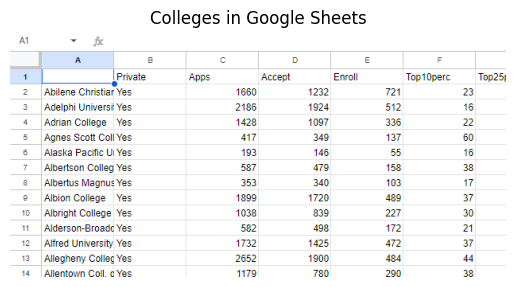

In [4]:
import PIL, urllib

url = image_root + "CollegesinGS.png"
image = PIL.Image.open(urllib.request.urlopen(url))
plt.title("Colleges in Google Sheets")
plt.imshow(image)
plt.axis('off')
plt.show()

a) We now want to read in our data and name the loaded data "college". We will use pandas (pd) to load the data in.

In [5]:
college_path = data_root + "College.csv"
college = pd.read_csv(college_path)

b) Next we look at the data

In [6]:
college

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [7]:
college.head(25)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


We don't really like this unnamed column, so we can try reading the data into pandas a few different ways:

In [8]:
college2 = pd.read_csv(college_path, index_col=0)
college2


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


For college2 we simply told pandas to use the first column (0) as the index

In [9]:
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1)
#axis{0 or ‘index’, 1 or ‘columns’} tells it to do the mapping on the columns by setting axis=1
college3 = college3.set_index('College')
college3

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


For college3 we rename the first column or college as "College" and also set this as the index. This is more like what we want, so lets save it as our 'college' dataframe.

In [10]:
college = college3

c) The describe() method produces a numerical summary of each column in a data frame.

In [11]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


d)  We want to use the pd.plotting.scatter_matrix() function to produce a
scatterplot matrix of the columns [Top10perc, Apps, Enroll].
First let's look at a list of columns in college:

In [12]:
college.columns

Index(['Private', 'Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc',
       'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books',
       'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend',
       'Grad.Rate'],
      dtype='object')

Selecting the 3 desired columns we make a scatterplot:

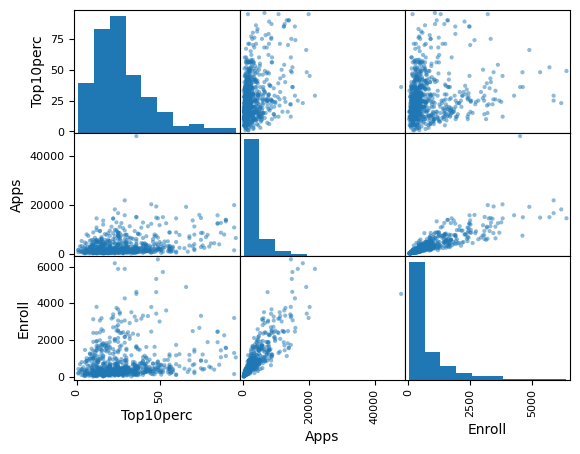

In [13]:
pd.plotting.scatter_matrix(college[['Top10perc', 'Apps', 'Enroll']]);

In [14]:
college.iloc[:, 3]

College
Abilene Christian University       721
Adelphi University                 512
Adrian College                     336
Agnes Scott College                137
Alaska Pacific University           55
                                  ... 
Worcester State College            543
Xavier University                  695
Xavier University of Louisiana     695
Yale University                   1317
York College of Pennsylvania       691
Name: Enroll, Length: 777, dtype: int64

Let's also try selecting them by column number

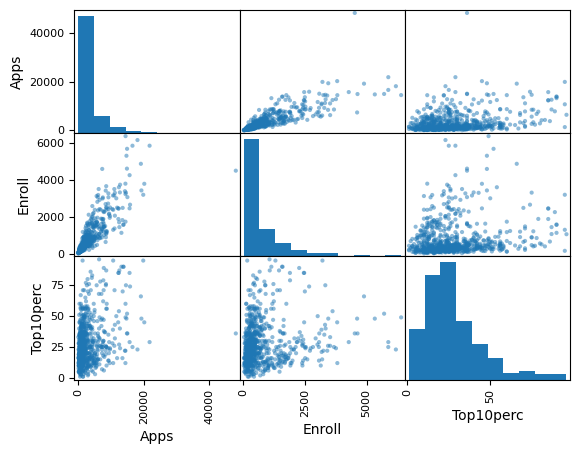

In [15]:
pd.plotting.scatter_matrix(college.iloc[:,[1,3,4]]);

e) Use the boxplot() method of college to produce side-by-side
boxplots of Outstate versus Private.

<Axes: title={'center': 'Outstate'}, xlabel='Private'>

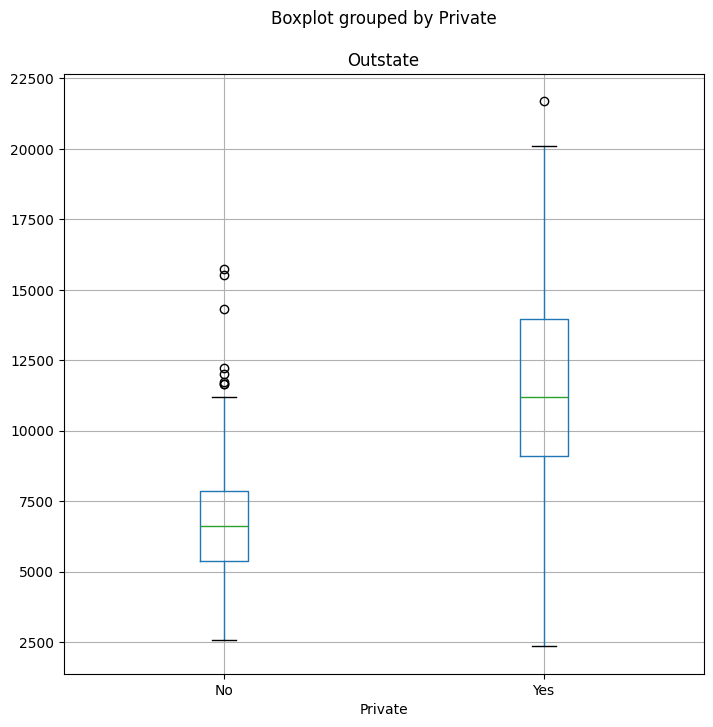

In [16]:
fig, ax = subplots(figsize=(8, 8))
college.boxplot('Outstate', by='Private', ax=ax)

f) Create a new qualitative variable, called Elite, by binning the
Top10perc variable into two groups based on whether or not the
proportion of students coming from the top 10% of their high
school classes exceeds 50%

In [17]:
college['Elite'] = pd.cut(college['Top10perc'],[0, 50, 100], labels=['No','Yes'])


try to count elites

In [18]:
college['Elite'].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

In [19]:
college['Elite']

College
Abilene Christian University       No
Adelphi University                 No
Adrian College                     No
Agnes Scott College               Yes
Alaska Pacific University          No
                                 ... 
Worcester State College            No
Xavier University                  No
Xavier University of Louisiana     No
Yale University                   Yes
York College of Pennsylvania       No
Name: Elite, Length: 777, dtype: category
Categories (2, object): ['No' < 'Yes']

Make a boxplot of Elite and Outstate

<Axes: title={'center': 'Outstate'}, xlabel='Elite'>

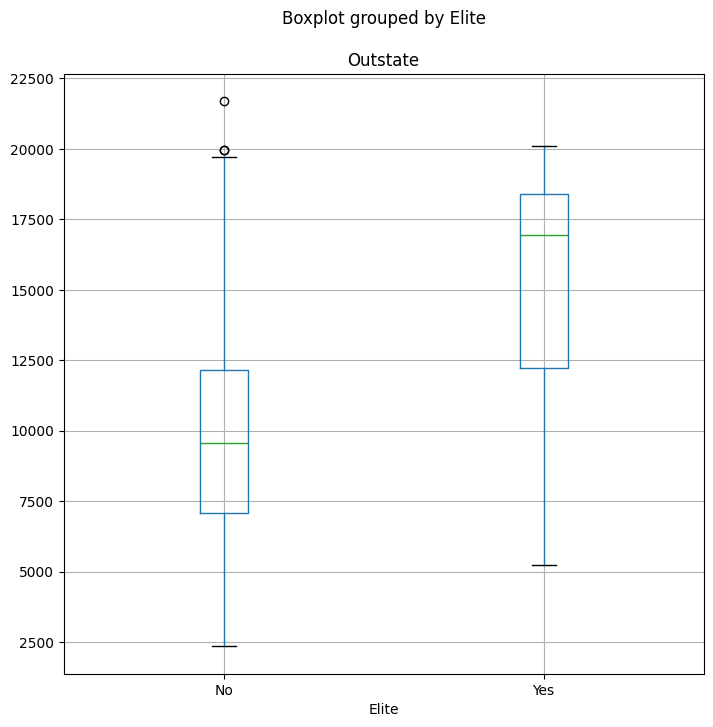

In [20]:
fig, ax = subplots(figsize=(8, 8))
college.boxplot('Outstate', by='Elite', ax=ax)

g) Use the plot.hist() method of college to produce some histograms with difering numbers of bins for a few of the quantitative variables. The command plt.subplots(2, 2) may be useful: it will divide the plot window into four regions so that four
plots can be made simultaneously. By changing the arguments
you can divide the screen up in other combinations.

<Axes: ylabel='Frequency'>

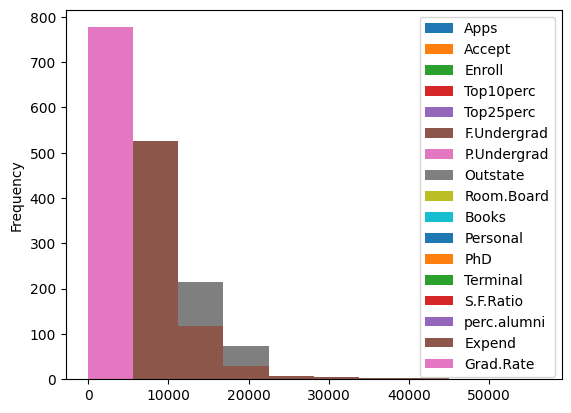

In [21]:
college.plot.hist()

Plot each using histogram bins and 2x2 subplot

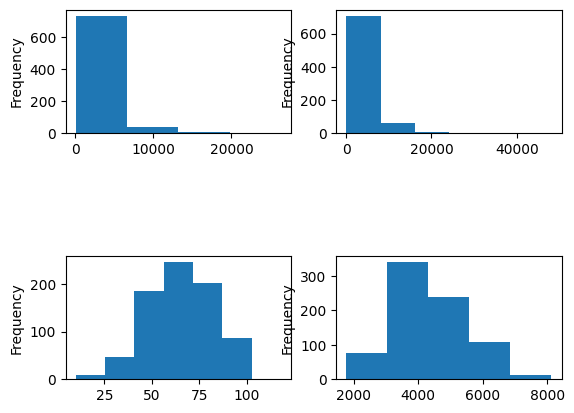

In [22]:
# Plot histograms
fig = plt.figure()

plt.subplot(221)
college['Accept'].plot.hist(bins=4)
plt.subplot(222)
college['Apps'].plot.hist(bins=6)
plt.subplot(223)
college['Grad.Rate'].plot.hist(bins=7)
plt.subplot(224)
college['Room.Board'].plot.hist(bins=5)

fig.subplots_adjust(hspace=1) # Add space between plots


h) Continue to explore the data.

## Exercise 10

a) Load Boston data set

In [ ]:
from ISLP import load_data

In [ ]:
Boston = load_data('Boston')

In [ ]:
type(Boston)

Boston is of the correct type, dataframe

In [ ]:
Boston

Description from [site](https://islp.readthedocs.io/en/latest/datasets/Boston.html):

A data set containing housing values in 506 suburbs of Boston.
     
- `crim`: per capita crime rate by town.

- `zn`: proportion of residential land zoned for lots over 25,000
          sq.ft.

- `indus`: proportion of non-retail business acres per town.

- `chas`: Charles River dummy variable (= 1 if tract bounds river; 0
          otherwise).

- `nox`: nitrogen oxides concentration (parts per 10 million).

- `rm`: average number of rooms per dwelling.

- `age`: proportion of owner-occupied units built prior to 1940.

- `dis`: weighted mean of distances to five Boston employment
          centres.

- `rad`: index of accessibility to radial highways.

- `tax`: full-value property-tax rate per $10,000.

- `ptratio`: pupil-teacher ratio by town.

- `lstat`: lower status of the population (percent).

- `medv`: median value of owner-occupied homes in $1000s.

b) To get the rows and columns I'll look at the shape

In [ ]:
Boston.shape

We have 506 rows representing towns in the boston area and 13 columns representing features of them

c) Pairwise scatterplots

Look at columns

In [ ]:
Boston.columns

Make a scatterplot of a few

In [ ]:
pd.plotting.scatter_matrix(Boston.iloc[:,[0,3,4,9]]);

d) Predictors associated with per capita crime rate?


From above, it looks like there may be a correlation with nox. Let's try a few more.

In [ ]:
pd.plotting.scatter_matrix(Boston.iloc[:,[0,1,2,3,4,5,6]]);

In [ ]:
pd.plotting.scatter_matrix(Boston.iloc[:,[0,7,8,9,10,11,12]]);

Potential: nox, rm, age, lstat, medv

In [ ]:
pd.plotting.scatter_matrix(Boston[['crim', 'nox'
]])

In [ ]:
pd.plotting.scatter_matrix(Boston[['crim', 'rm'
]])

In [ ]:
pd.plotting.scatter_matrix(Boston[['crim', 'lstat'
]])

In [ ]:
pd.plotting.scatter_matrix(Boston[['crim', 'medv'
]])

e) Which suburbs have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor

Make boxplots to look for outliers

In [ ]:
#fig, ax = subplots(figsize=(8, 8))
#Boston.boxplot('crim', by='tax rates', ax=ax)

f)